In [9]:
!pip install gdown
!pip install pandas
!pip install tensorflow
!pip install scikit-learn
!pip install matplotlib

  Using cached matplotlib-3.9.2-cp310-cp310-macosx_10_12_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp310-cp310-macosx_10_9_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.54.1-cp310-cp310-macosx_10_9_universal2.whl.metadata (163 kB)
  Using cached kiwisolver-1.4.7-cp310-cp310-macosx_10_9_x86_64.whl.metadata (6.3 kB)
Using cached matplotlib-3.9.2-cp310-cp310-macosx_10_12_x86_64.whl (7.9 MB)
Using cached contourpy-1.3.0-cp310-cp310-macosx_10_9_x86_64.whl (265 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.54.1-cp310-cp310-macosx_10_9_universal2.whl (2.8 MB)
Using cached kiwisolver-1.4.7-cp310-cp310-macosx_10_9_x86_64.whl (65 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 8.7 MB/s eta 0:00:0000:01:00:01


Downloading...
From: https://drive.google.com/uc?id=1mfpXVLqDJah-sO0CF29LjKUz5NtKjZqc
To: /Users/pepeargentoo/AAII-2/dataset.zip
100%|██████████| 49.7k/49.7k [00:00<00:00, 1.50MB/s]

Descargado: dataset.zip
Contenido extraído en: .
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  
Epoch 1/50


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2751.5398 - mae: 47.9276 - val_loss: 56.2286 - val_mae: 6.0267
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - loss: 42.8321 - mae: 5.2231 - val_loss: 31.6164 - val_mae: 4.5070
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - loss: 29.2571 - mae: 4.3249 - val_loss: 23.0610 - val_mae: 3.8371
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - loss: 21.0618 - mae: 3.6622 - val_loss: 15.1997 - val_mae: 3.1326
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss: 13.9846 - mae: 2.9884 - val_loss: 9.9619 - val_mae: 2.5315
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.2499 - mae: 2.4292 - val_loss: 7.1508 - val_mae: 2.1263
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 6.9381 - mae: 2.0888 - val_loss: 5.7982 - val_mae: 1.9237
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - loss: 5.7796 - mae: 1.9081 - val_loss: 5.0320 - val_mae: 1.7884
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 

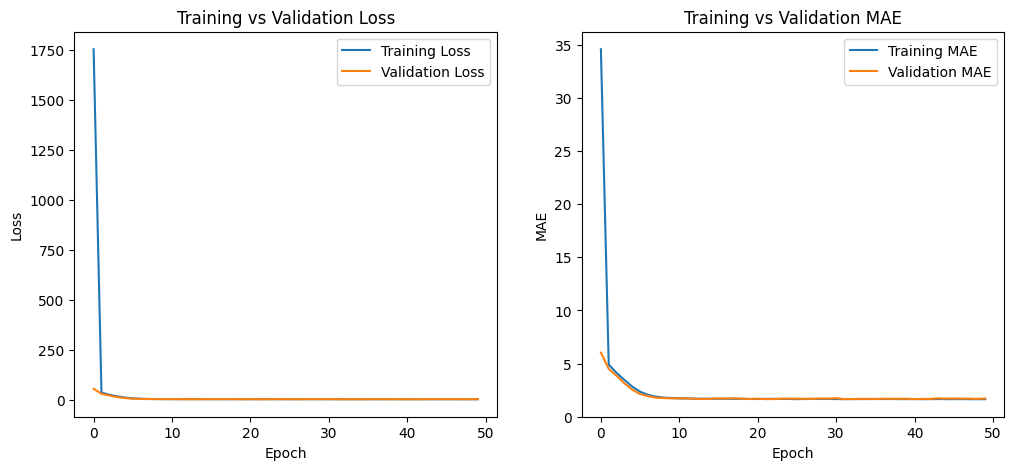

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step
Entrenamiento - MSE: 4.339669029823555, MAE: 1.6478861087560654, R²: 0.9882289470358827
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step
Test - MSE: 4.540693611529206, MAE: 1.7087579283714294, R²: 0.9877472315657458


In [11]:
import gdown
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import zipfile
import matplotlib.pyplot as plt

class RegressionModel:
    def __init__(self):
        self.dataset = None
        self.model = None

    def download_dataset(self, file_id, output_name="dataset.zip"):
        """Descarga el dataset desde Google Drive."""
        url = f"https://drive.google.com/uc?id={file_id}"
        gdown.download(url, output_name, quiet=False)
        print(f"Descargado: {output_name}")

    def extract_zip(self, zip_path="dataset.zip", extract_to="."):
        """Extrae el contenido del archivo ZIP."""
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to)
        print(f"Contenido extraído en: {extract_to}")

    def load_dataset(self, path="student_performance.csv"):
        """Carga el dataset en un DataFrame."""
        self.dataset = pd.read_csv(path, encoding='utf-8')
        print(self.dataset.head())
        return self.dataset

    def preprocess_data(self):
        """Preprocesa los datos para el entrenamiento."""
        data = self.dataset.copy()

        # Codificación de actividades extracurriculares (Sí/No)
        label_encoder = LabelEncoder()
        data['Extracurricular Activities'] = label_encoder.fit_transform(
            data['Extracurricular Activities']
        )

        # Separación de características y variable objetivo
        X = data.drop('Performance Index', axis=1)
        y = data['Performance Index']

        # Escalado de las características
        scaler = StandardScaler()
        X = scaler.fit_transform(X)

        return train_test_split(X, y, test_size=0.2, random_state=42)

    def build_model(self, input_dim):
        """Construye el modelo usando Input() en lugar de input_shape."""
        self.model = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(input_dim,)),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(1)  # Capa de salida
        ])
        self.model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    def train_model(self, X_train, y_train, X_val, y_val, epochs=50, batch_size=32):
        """Entrena el modelo y devuelve el historial."""
        history = self.model.fit(
            X_train, y_train, validation_data=(X_val, y_val),
            epochs=epochs, batch_size=batch_size, verbose=1
        )
        self.plot_training_history(history)
        return history

    def plot_training_history(self, history):
        """Grafica las métricas de entrenamiento y validación."""
        plt.figure(figsize=(12, 5))

        # Pérdida (Loss)
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Training vs Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        # MAE (Error Absoluto Medio)
        plt.subplot(1, 2, 2)
        plt.plot(history.history['mae'], label='Training MAE')
        plt.plot(history.history['val_mae'], label='Validation MAE')
        plt.title('Training vs Validation MAE')
        plt.xlabel('Epoch')
        plt.ylabel('MAE')
        plt.legend()

        plt.show()

    def evaluate_model(self, X_train, y_train, X_test, y_test):
        """Evalúa el modelo en entrenamiento y test."""
        # Evaluación en entrenamiento
        y_train_pred = self.model.predict(X_train).flatten()
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        print(f"Entrenamiento - MSE: {train_mse}, MAE: {train_mae}, R²: {train_r2}")

        # Evaluación en test
        y_test_pred = self.model.predict(X_test).flatten()
        test_mse = mean_squared_error(y_test, y_test_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        test_r2 = r2_score(y_test, y_test_pred)
        print(f"Test - MSE: {test_mse}, MAE: {test_mae}, R²: {test_r2}")

# Uso del modelo
file_id = "1mfpXVLqDJah-sO0CF29LjKUz5NtKjZqc"
model = RegressionModel()
model.download_dataset(file_id)
model.extract_zip()

data = model.load_dataset("student_performance.csv")
X_train, X_test, y_train, y_test = model.preprocess_data()
model.build_model(input_dim=X_train.shape[1])
history = model.train_model(X_train, y_train, X_test, y_test)
model.evaluate_model(X_train, y_train, X_test, y_test)